### IMPORT

In [1]:
import os, sys
import subprocess
import numpy as np
import matplotlib.pyplot as plt

from torchvision.utils import make_grid

In [2]:
if os.path.basename(os.getcwd()) == 'notebooks':
    parent_dir = os.path.abspath(os.path.join('..'))  
    sys.path.append(parent_dir) 

from src.data_loader import create_dataloader

### VISU FUNCTIONS

In [3]:
def sample_grid(first_batch, nrow=8):
    """
    Display a grid of images.
    """
    grid_img = make_grid(first_batch, nrow=nrow, normalize=True, padding=True, pad_value=1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_img.permute(1, 2, 0).numpy(), cmap='gray')
    plt.axis("off")
    plt.show()



In [4]:
# helpers
def print_image_statistics(image, title):
    img = np.squeeze(image).ravel()
    print(f"{title}:\nMin: {np.min(img):.4f}, Max: {np.max(img):.4f}, Mean: {np.mean(img):.4f}, "
          f"Median: {np.median(img):.4f}, Var: {np.var(img):.4f}, Std: {np.std(img):.4f}\n")

def plot_image_and_histogram(image, title):

    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(image), cmap='gray')
    plt.axis('off')
    plt.title(title)
    
    plt.subplot(1, 2, 2)
    plt.hist(np.squeeze(image).ravel(), bins=50, color='blue', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

In [5]:
def image_plot(dataloader):
    batch = next(iter(dataloader))
    random_idx = np.random.randint(0, len(batch))  
    image_1 = batch[random_idx].numpy() 
    image_2 = np.squeeze(image_1)  # Remove channel dimension
    print_image_statistics(image_2, "norm stats")

    # Plot the image and histogram side by side
    plt.figure(figsize=(12, 6))
    plot_image_and_histogram(image_2, "norm Image")
    plt.tight_layout()
    plt.show()

### load data

In [6]:
# # real data
# file_name = 'SWFD_semicircle_RawBP.h5'
# key = 'sc_BP'

# simulated data
file_name = 'SCD_RawBP-mini.h5'
key = 'vc_BP'

In [7]:
# renku +++
# oadat_dir = '/home/jovyan/work/oadat-ddpm/data'

# subprocess.run(
#     ["rsync", "-avzhP", f"/home/jovyan/work/oadat/{file_name}", oadat_dir], check=True
# )
# +++

# LOCAL
oadat_dir = 'C:/Users/carlo/OADAT'
# oadat_dir = 'D:/OADAT'

### data expo

In [8]:
# Main execution
batch_size = 9
# norm:  scaleclip [-0.2,1], norm1_scaleclip [-1,1], norm2_scaleclip [0,1] !!!!
norm_params = {"norm": 'norm1_scaleclip'}
prng = np.random.RandomState(42)
dataloader = create_dataloader(oadat_dir, file_name, key, norm_params['norm'], batch_size, 
                               shuffle=True, num_workers=0, prng=prng, indices=None)

first_batch = next(iter(dataloader))

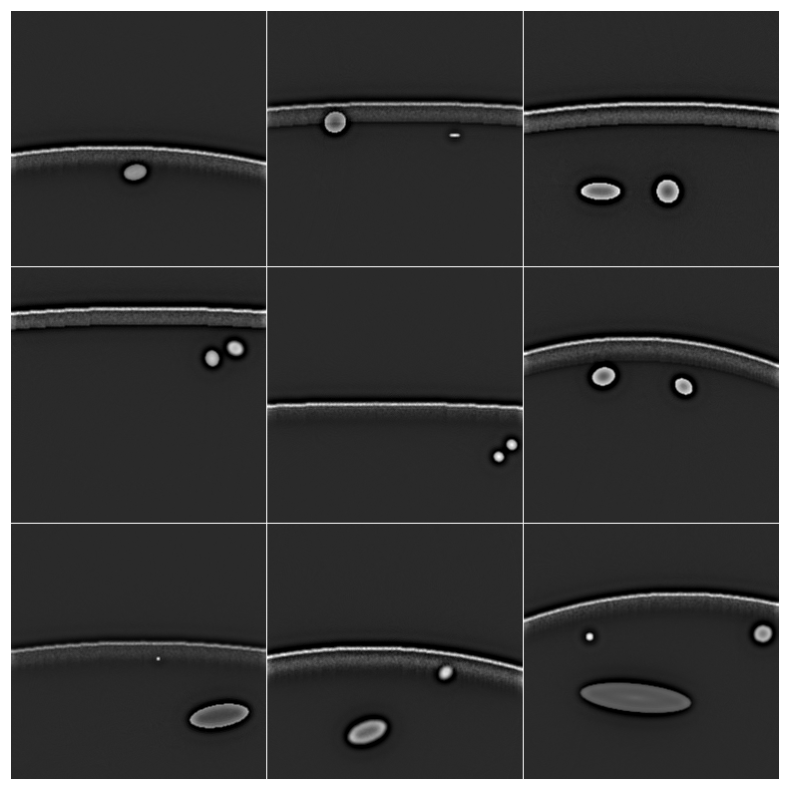

In [9]:
sample_grid(first_batch, nrow=3) 

norm stats:
Min: -1.0000, Max: 1.0000, Mean: -0.6617, Median: -0.6714, Var: 0.0215, Std: 0.1466



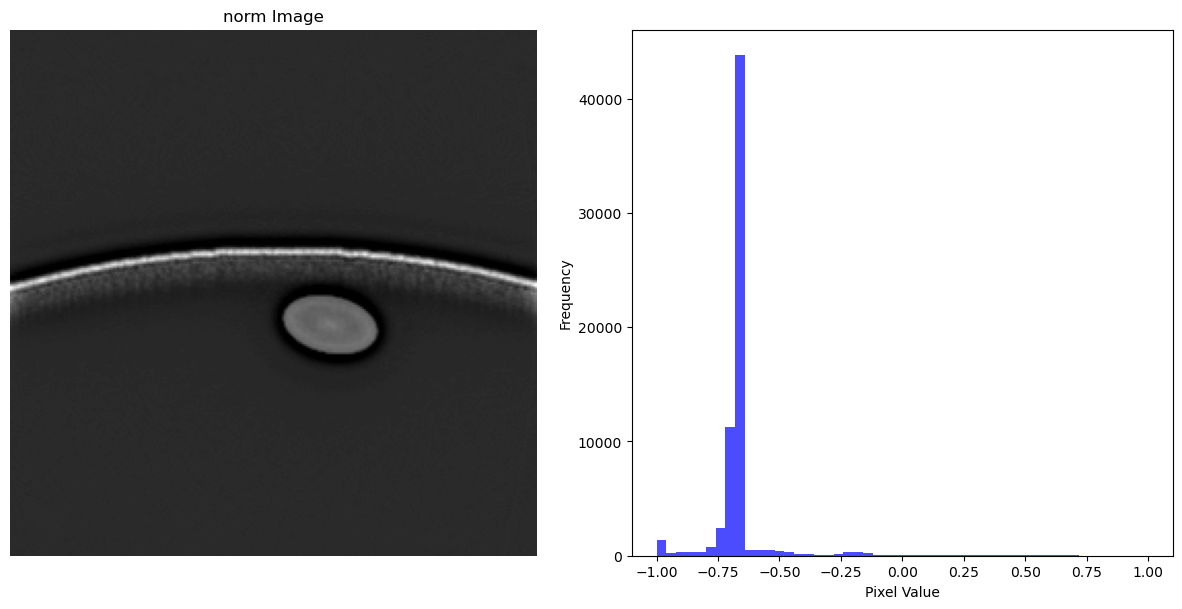

In [10]:
# Process a random image from the batch
image_plot(dataloader)